<a href="https://colab.research.google.com/github/Ayushx29/Integrated-Retail-Analytics-for-Store-Optimization/blob/main/Integrated_Retail_Analytics_For_Store_Optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Integrated Retail Analytics for Store Optimization



##### **Project Type**    - EDA/Regression/Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -** Ayush Bhagat


# **Project Summary -**

The "Integrated Retail Analytics for Store Optimization and Demand Forecasting" project aims to harness the power of machine learning, data analytics, and statistical techniques to improve store-level performance, forecast future demand, and deliver actionable insights for personalized marketing and operational efficiency. This comprehensive initiative addresses key business challenges faced by large retail chains in understanding customer behavior, managing inventory effectively, and optimizing resource allocation across geographically dispersed locations.

A core component of the project is anomaly detection in sales data, where unusual patterns—such as sudden spikes or drops in weekly sales—are identified and analyzed. These anomalies could be triggered by factors like holidays, promotional markdowns, weather conditions, or economic shifts. Detecting and handling these anomalies ensures the data is clean and reliable for downstream modeling and analysis. In parallel, time-based anomaly detection focuses on uncovering seasonal trends and holiday effects. Time-series analysis techniques are applied to understand how sales fluctuate throughout the year and how these fluctuations vary across different departments and store types.

Another essential phase involves data preprocessing and feature engineering. This includes handling missing values—particularly in the Markdown data—and deriving meaningful features such as store size, type, regional economic indicators, and time-based attributes (e.g., holiday proximity). These engineered features enrich the dataset, allowing for more accurate predictions and deeper insights.

The project also explores customer and store segmentation using unsupervised learning techniques such as clustering. By analyzing sales patterns, markdown frequency, and store attributes, the project segments stores or departments into homogenous groups. This segmentation helps in tailoring marketing strategies and operational decisions specific to each group. Segment effectiveness is evaluated using statistical metrics to ensure meaningful separation and internal consistency.

Given the lack of individual transaction data, the project conducts a form of market basket analysis by inferring product associations within departments using aggregated sales data. Although limited, this approach can still provide insights into potential cross-selling opportunities and complementary product relationships.

One of the central objectives of the project is demand forecasting. Using regression-based and time-series forecasting models (e.g., ARIMA, XGBoost, Prophet), the project predicts weekly sales for each store-department combination. External variables such as fuel prices, unemployment rates, and the Consumer Price Index (CPI) are integrated to enhance forecasting accuracy. Both short-term and long-term forecasting horizons are considered to support tactical and strategic planning.

To complement demand forecasting, the impact of external factors like regional climate, economic conditions, and store location is thoroughly examined. These insights feed back into forecasting models and help in explaining observed trends and making data-driven decisions.

From a business strategy perspective, the project proposes personalization strategies based on store clusters and markdown behavior. For instance, stores with price-sensitive customers might benefit from frequent, targeted promotions, while others may perform better with inventory-driven markdowns. These strategies help in optimizing both marketing efforts and stock levels.

The project concludes by formulating a comprehensive real-world strategy for inventory management, marketing, and store optimization. It also identifies potential implementation challenges, such as data quality issues, operational constraints, and the complexity of deploying ML models at scale.

In summary, this project brings together multiple data science techniques—exploratory data analysis, regression, time-series forecasting, clustering, and association rule mining—to create a unified, data-driven framework for enhancing retail decision-making. The final deliverables include predictive models, segmentation insights, anomaly detection systems, and a strategic roadmap for applying these insights to real-world retail operations.

# **GitHub Link -**

https://github.com/Ayushx29/Integrated-Retail-Analytics-for-Store-Optimization

# **Problem Statement**


**Retail chains face challenges in accurately forecasting product demand, identifying sales anomalies, and understanding store-level performance due to diverse regional factors, seasonal trends, and inconsistent promotional effects. This project aims to develop a data-driven solution that leverages machine learning and analytics to optimize sales forecasting, detect anomalies, and segment stores for targeted marketing and inventory strategies, ultimately improving operational efficiency and customer satisfaction.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [3]:
# Load Dataset
feature_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Integrated Retail Analytics AML/Retail Datsets/Features data set.csv")
sales_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Integrated Retail Analytics AML/Retail Datsets/sales data-set.csv")
store_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/Integrated Retail Analytics AML/Retail Datsets/stores data-set.csv")

### Dataset First View

In [4]:
# Dataset First Look
feature_df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [5]:
sales_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [6]:
store_df.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
feature_df.shape,sales_df.shape,store_df.shape

((8190, 12), (421570, 5), (45, 3))

### Dataset Information

In [9]:
# Dataset Info
print("Feature DataFrame Information:")
print(feature_df.info())
print("\n" + "-"*50 + "\n")

print("Sales DataFrame Information:")
print(sales_df.info())
print("\n" + "-"*50 + "\n")

print("Store DataFrame Information:")
print(store_df.info())

Feature DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None

--------------------------------------------------

Sales DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 

In [10]:
print("Feature DataFrame Information:")
print(feature_df.nunique())
print("\n" + "-"*50 + "\n")

print("Sales DataFrame Information:")
print(sales_df.nunique())
print("\n" + "-"*50 + "\n")

print("Store DataFrame Information:")
print(store_df.nunique())

Feature DataFrame Information:
Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

--------------------------------------------------

Sales DataFrame Information:
Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

--------------------------------------------------

Store DataFrame Information:
Store    45
Type      3
Size     40
dtype: int64


## ***2. Exploratory Data Analysis***

In [11]:
# Change date format
feature_df['Date'] = pd.to_datetime(feature_df['Date'], format = 'mixed')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format = 'mixed')

In [12]:
# Merge different datasets
df = pd.merge(sales_df, feature_df, how = 'left', on = ['Store','Date','IsHoliday']) # merging sales and features by left since there are more rows for sales
df_new = pd.merge(df, store_df, how = 'left', on = 'Store') #merge df and df_stores by left to keep all the columns and rows
df_new = df_new.fillna(0)

In [13]:
df_new.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315
5,1,1,2010-12-03,21043.39,False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,A,151315
8,1,1,2010-02-04,57258.43,False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,A,151315
9,1,1,2010-09-04,42960.91,False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,A,151315


In [14]:
# Dataset information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [15]:
# Checking the number of unique values
df_new.nunique()

,0
Store,45
Dept,81
Date,143
Weekly_Sales,359464
IsHoliday,2
Temperature,3528
Fuel_Price,892
MarkDown1,2278
MarkDown2,1499
MarkDown3,1662


In [16]:
# Seperate Numerical and Categorical Variables
cat_cols =['Store', 'Dept', 'IsHoliday', 'Type']
num_cols = df_new.columns.drop(cat_cols)
num_cols = num_cols.drop('Date') # Drop 'Date' column from numerical columns

print('Categorical Variables:')
print(cat_cols)

print('Numerical Variables:')
print(num_cols)

Categorical Variables:
['Store', 'Dept', 'IsHoliday', 'Type']
Numerical Variables:
Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size'],
      dtype='object')


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df_new[cat_cols].nunique()

,0
Store,45
Dept,81
IsHoliday,2
Type,3


In [18]:
df_new[num_cols].nunique()

,0
Weekly_Sales,359464
Temperature,3528
Fuel_Price,892
MarkDown1,2278
MarkDown2,1499
MarkDown3,1662
MarkDown4,1945
MarkDown5,2294
CPI,2145
Unemployment,349


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####1. What Is The Trend In Average Unemployment Rate Across Time?

<function matplotlib.pyplot.show(close=None, block=None)>

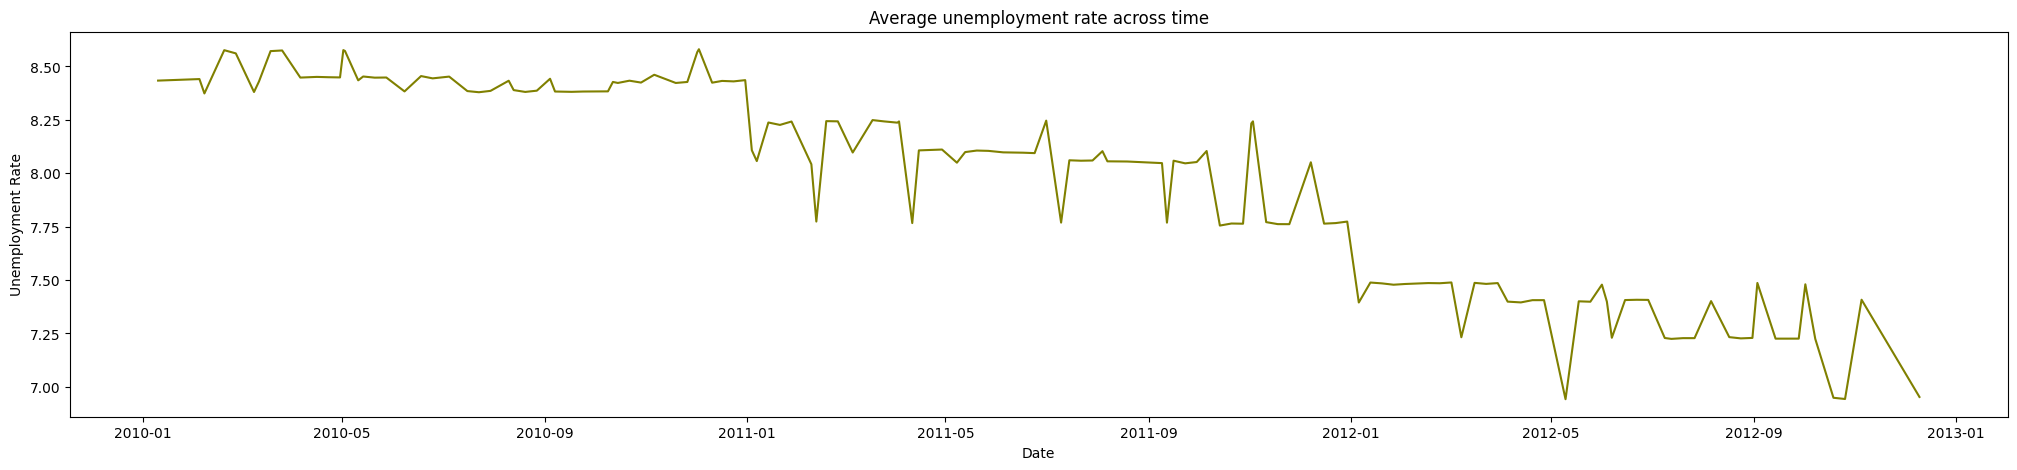

In [19]:
# Chart - 1 visualization code
unn_across_time = df_new.groupby(by = ['Date'], as_index= False)['Unemployment'].mean() # average rate of unemployment each date for all the different outlets
plt.figure(figsize = (25,5))
plt.plot(unn_across_time.Date, unn_across_time.Unemployment,color="olive")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Average unemployment rate across time")
plt.show

#####  What is/are the insight(s) found from the chart?

January 2010 to December 2012: Gradual decrease in the unemployment rate.This result in improving the purchasing power of the customer.

####2. What Is The Trend In Average Fuel Price; Temperature Across Time?

Text(0.5, 1.0, 'Average Fuel Price across time')

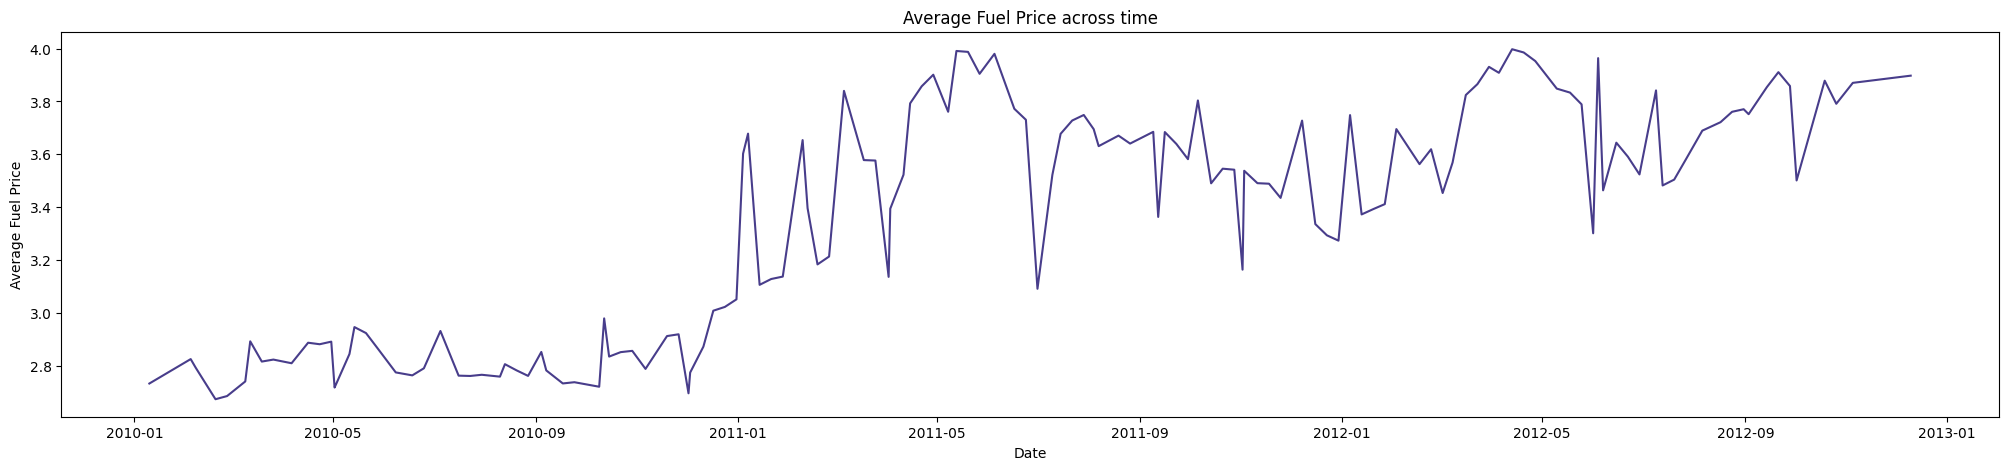

In [20]:
# Chart - 2 visualization code
# Average fuel price across time
fuel_across_time = df_new.groupby(by = ['Date'], as_index= False)['Fuel_Price'].mean()
plt.figure(figsize=(25,5))
plt.plot(fuel_across_time.Date, fuel_across_time.Fuel_Price, color="darkslateblue")
plt.xlabel('Date')
plt.ylabel('Average Fuel Price')
plt.title("Average Fuel Price across time")

Text(0.5, 1.0, 'Average Temperature across time')

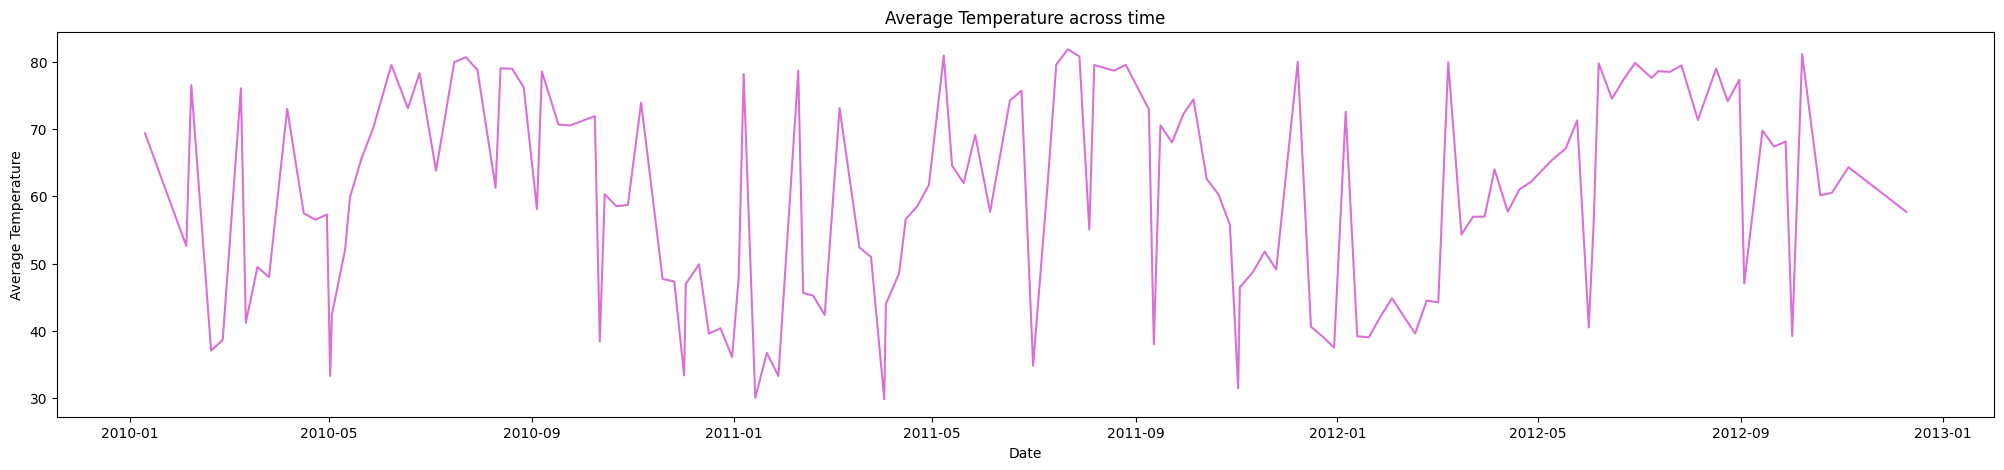

In [21]:
# Temperature  across time
temp_across_time = df_new.groupby(by = ['Date'], as_index= False)['Temperature'].mean()
plt.figure(figsize=(25,5))
plt.plot(temp_across_time.Date, temp_across_time.Temperature, color="orchid")
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title("Average Temperature across time")

#####What is/are the insight(s) found from the chart?



1.   January 2010 to December 2010: Stable fuel price rate with no significant changes.
2.   January 2011 to December 2012: Gradual increase in fuel prices attributed to inflationary factors.

1.   The average temperature shows a clear seasonal pattern, peaking mid-year and dipping at the start and end, indicating consistent yearly cycles.
2.   Irregular spikes and drops suggest potential data gaps or extreme weather events that may impact retail planning.





####3. What Is The Trend In Average CPI Across Time?

**Consumer price index - measure of the average change overtime in the prices paid for a basket of consumer goods and services Higher CPI indicates a higher inflation**

Text(0.5, 1.0, 'Average CPI across time')

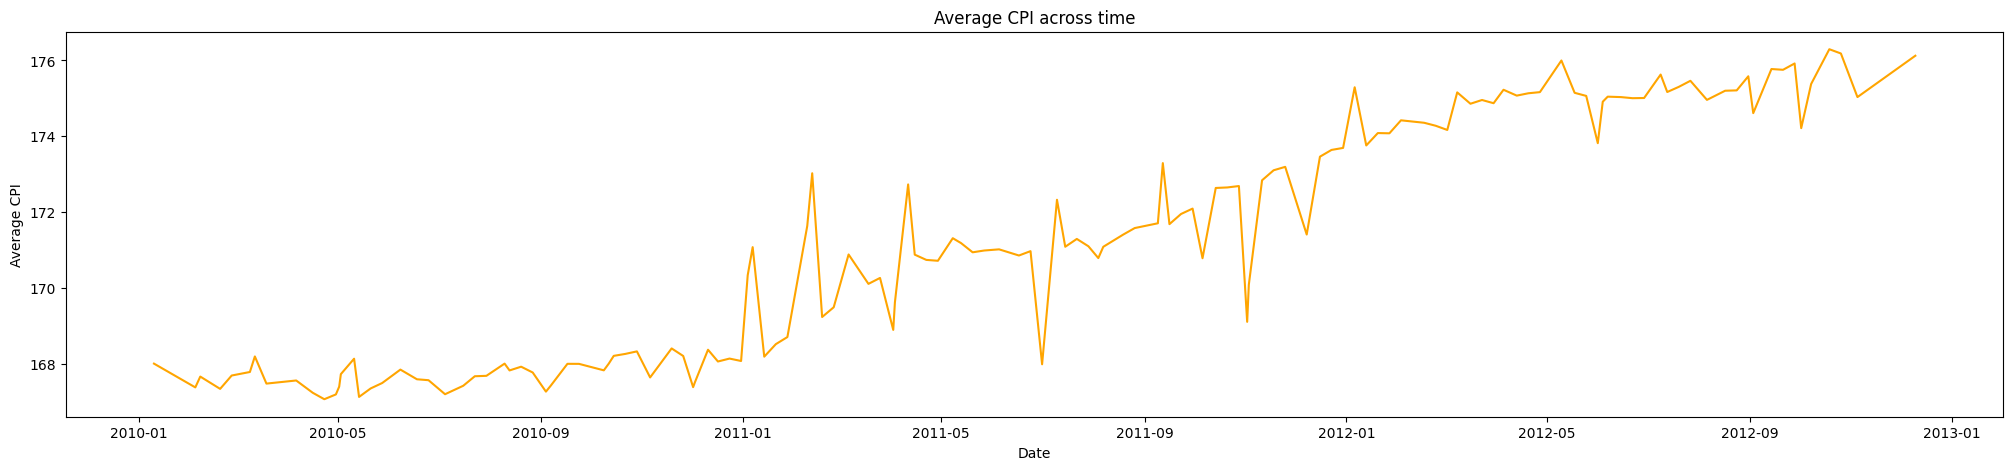

In [22]:
# Chart - 3 visualization code
cpi_across_time = df_new.groupby(by = ['Date'], as_index= False)['CPI'].mean()
plt.figure(figsize = (25,5))
plt.plot(cpi_across_time.Date, cpi_across_time.CPI, color="orange")
plt.xlabel('Date')
plt.ylabel("Average CPI")
plt.title("Average CPI across time")

##### What is/are the insight(s) found from the chart?

From January 2010 to December 2012 we have noted a gradual increase in the consumer price index from due to inflation.

####4. What Is The Trend In Weekly Sales Across Time, Per Year, Per Month?

<function matplotlib.pyplot.show(close=None, block=None)>

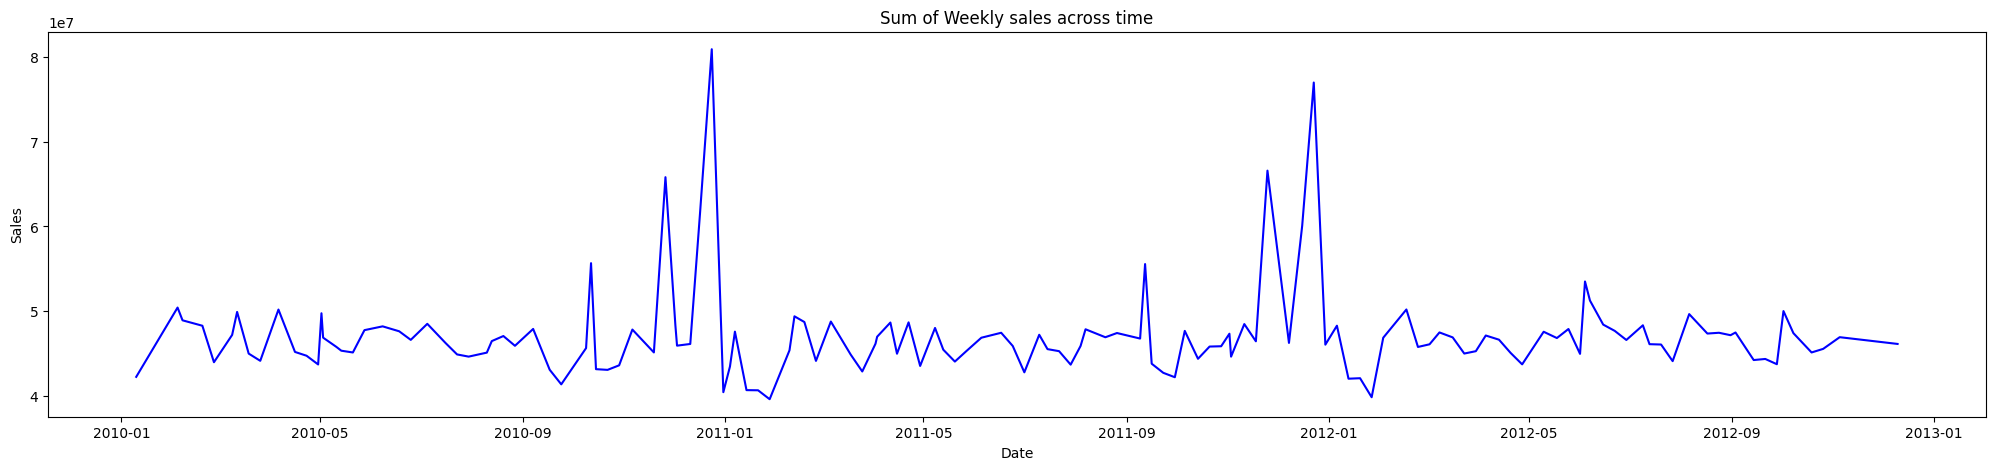

In [23]:
# Chart - 4 visualization code
sales_across_time = df_new.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()

plt.figure(figsize = (25,5))
plt.plot(sales_across_time.Date, sales_across_time.Weekly_Sales,color="b")
plt.title("Sum of Weekly sales across time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show

<ipython-input-29-161514533>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'viridis')


Text(0.5, 0, 'Years')

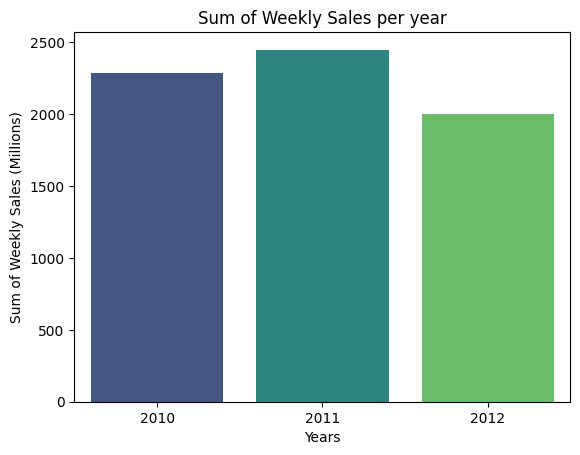

In [29]:
# Sum Of Weekly Sales Per Year
yearly_sales = df_new.groupby(df_new.Date.dt.year)['Weekly_Sales'].sum()/1000000
sns.barplot(x = yearly_sales.index, y = yearly_sales.values, palette = 'viridis')
plt.title("Sum of Weekly Sales per year")
plt.ylabel("Sum of Weekly Sales (Millions)")
plt.xlabel("Years")

<ipython-input-30-1009293339>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='magma')


Text(0.5, 1.0, 'Sum of weekly sales per month')

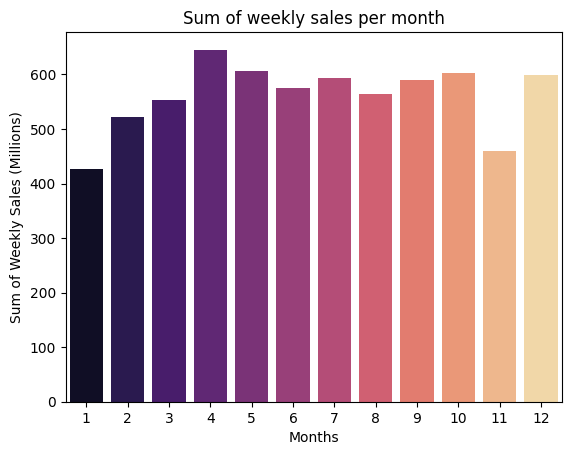

In [30]:
# Sum Of Weekly Sales Each Month
monthly_sales = df_new.groupby(df_new.Date.dt.month)['Weekly_Sales'].sum()/1000000
sns.barplot(x = monthly_sales.index, y = monthly_sales.values, palette='magma')
plt.xlabel('Months')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title("Sum of weekly sales per month")

##### 2. What is/are the insight(s) found from the chart?

* Sales experience a noticeable boost during special promotions and holidays (like Black Friday, Christmas, and New Year), but this is often followed by a drop. Afterward, sales pick up again in certain months.

* November shows a dip in purchasing activity, likely because customers are waiting for upcoming sales.

* The data for December 2013 seems to be incomplete; although there was a surge, overall sales didn't reach significant levels due to the limited data available.

In [31]:
# Top 10 dates where weekly_sales are the highest
sales_across_time = df_new.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()
sort_sales_across_time = sales_across_time.sort_values('Weekly_Sales', ascending = False) # sort in descending order
sort_sales_across_time.head(10)

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85
97,2011-12-16,60085695.94
35,2010-10-12,55666770.39
83,2011-09-12,55561147.70
120,2012-06-04,53502315.87
121,2012-06-07,51253021.88


####5. Which Department Have The Highest Earner?

<ipython-input-33-1477050460>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='icefire')


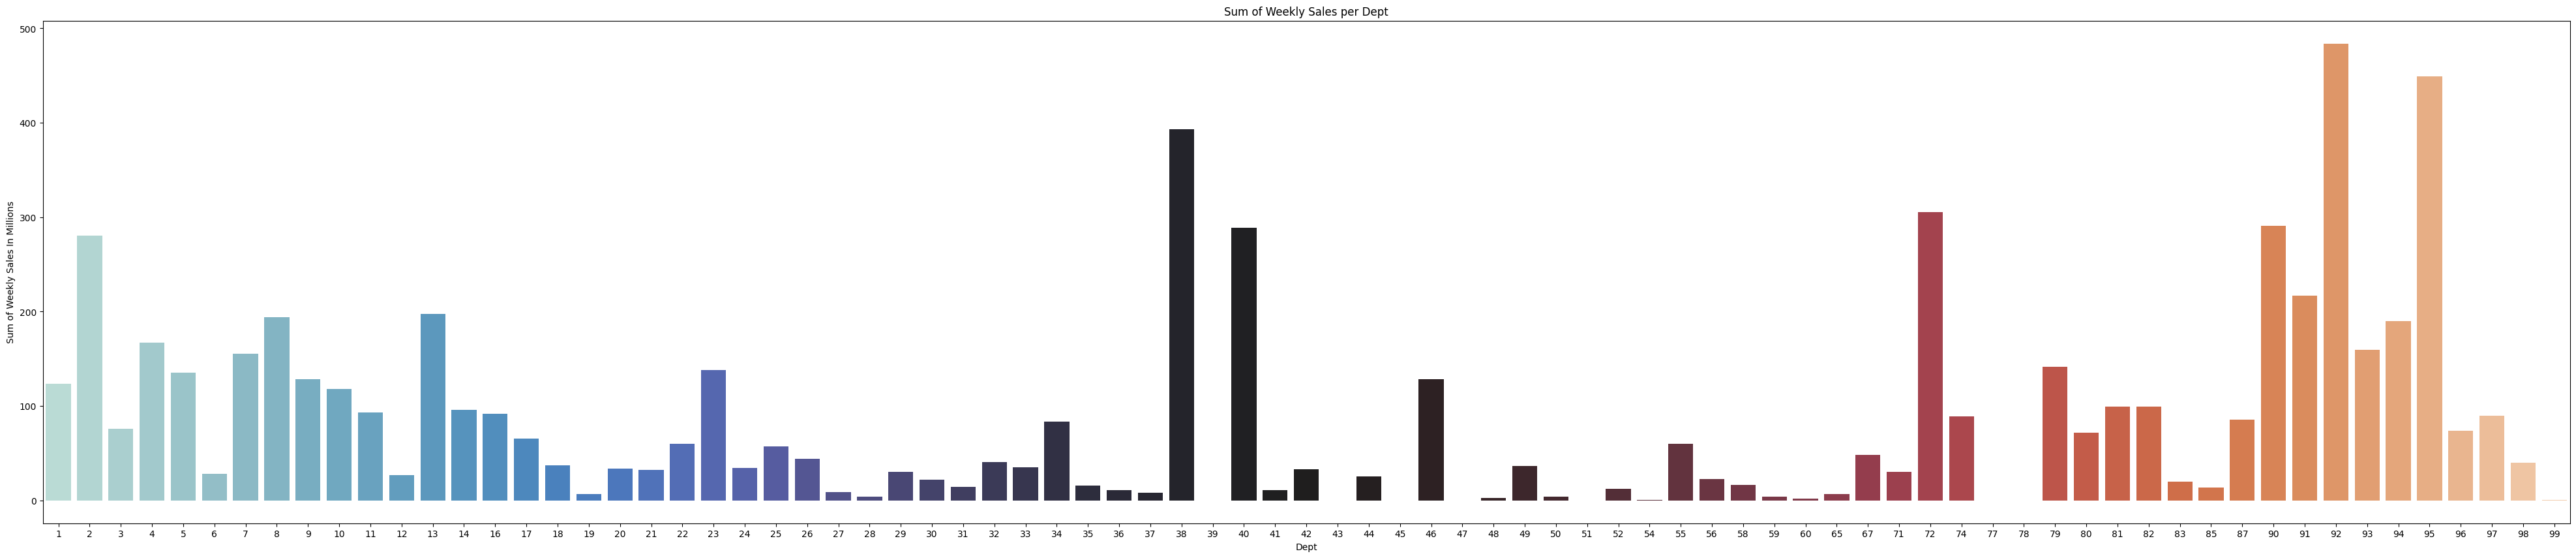

In [33]:
# Chart - 5 visualization code
dept_sales = df_new.groupby(by = ['Dept'], as_index= False)['Weekly_Sales'].sum()
dept_sales['Weekly_Sales'] = dept_sales['Weekly_Sales']/1000000
plt.figure(figsize=(50,10))
sns.barplot(x = dept_sales.Dept, y = dept_sales.Weekly_Sales , data = dept_sales, palette ='icefire')
plt.xlabel('Dept')
plt.ylabel('Sum of Weekly Sales In Millions')
plt.title('Sum of Weekly Sales per Dept')
plt.show()

#####What is/are the insight(s) found from the chart?

Certain departments which are department number 1-15, 38, 40, 72, and 90-95 demonstrate notably higher weekly sales, with an average increase of 25%.

####6. Which Stores Have The Highest Earner?


<ipython-input-34-3081496321>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales, palette = 'mako')


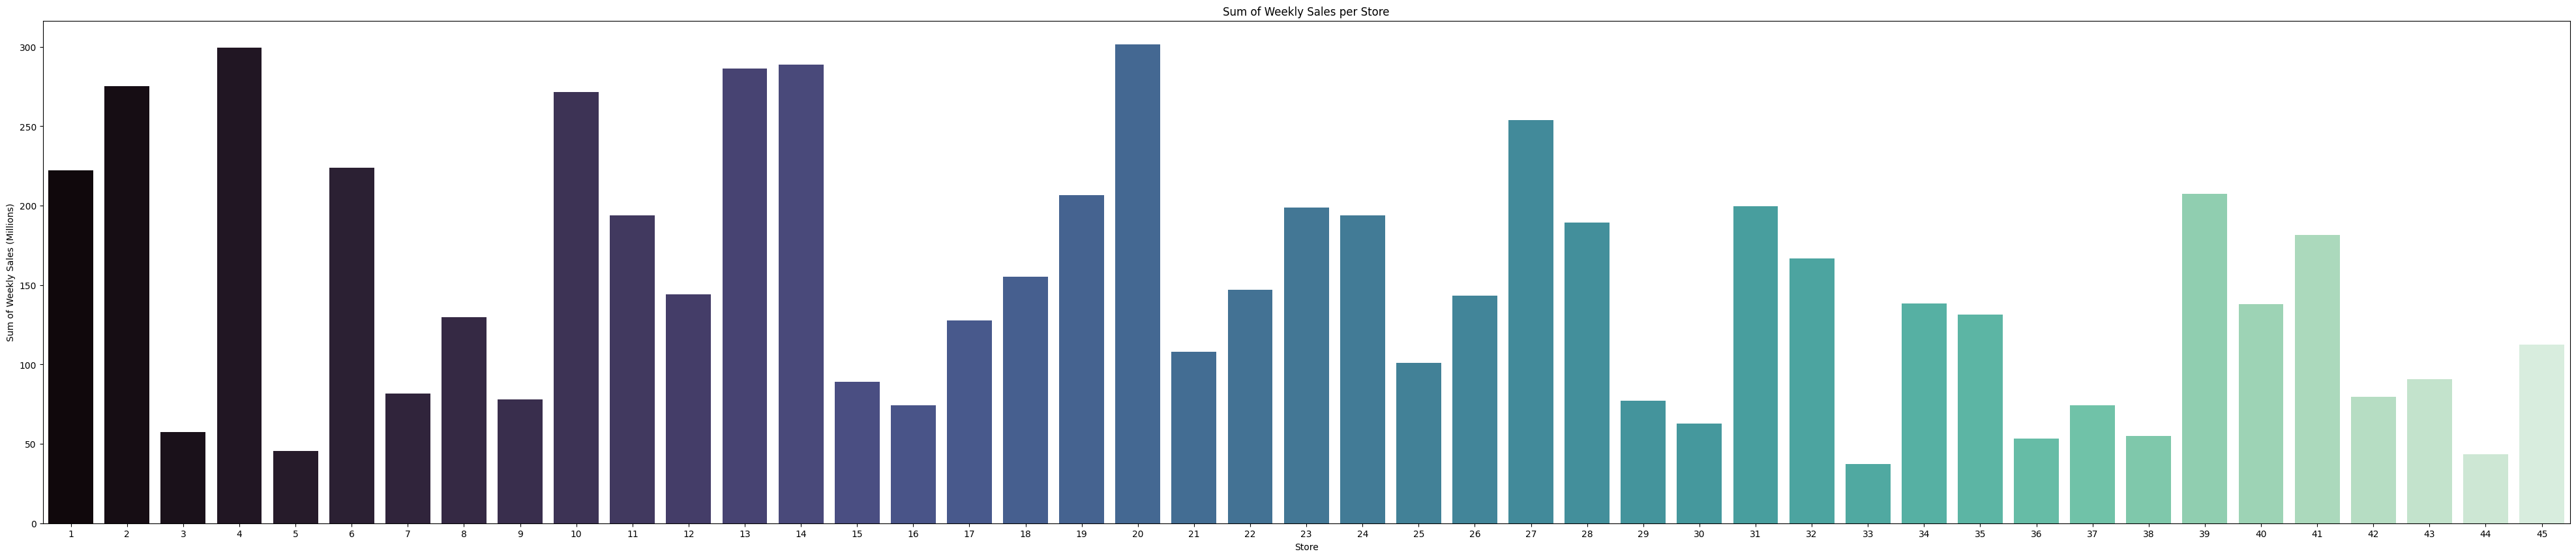

In [34]:
# Chart - 6 visualization code
stores_sales = df_new.groupby(by = ['Store'], as_index= False)['Weekly_Sales'].sum()
stores_sales['Weekly_Sales'] = stores_sales['Weekly_Sales']/1000000
plt.figure(figsize= (50,10))
sns.barplot(x = stores_sales.Store, y = stores_sales.Weekly_Sales , data = stores_sales, palette = 'mako')
plt.xlabel('Store')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Store')
plt.show()

#####What is/are the insight(s) found from the chart?

Store number 20 and 4 were identified as the top earners based on their weekly sales, while store number 44, 33, 3 and 5 emerged as the least profitable.

####  7. Which Type Of Store Have The Highest Earner?

<ipython-input-35-33890455>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'crest')


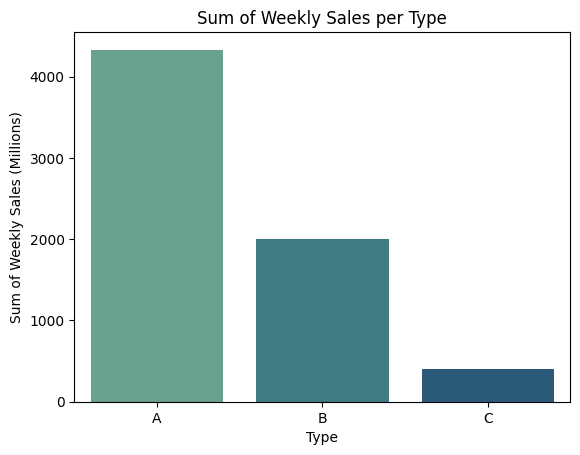

In [35]:
# Chart - 7 visualization code
type_sales = df_new.groupby(by = ['Type'], as_index= False)['Weekly_Sales'].sum()
type_sales['Weekly_Sales'] = type_sales['Weekly_Sales']/1000000
sns.barplot(x = type_sales.Type, y = type_sales.Weekly_Sales , data = type_sales, palette = 'crest')
plt.xlabel('Type')
plt.ylabel('Sum of Weekly Sales (Millions)')
plt.title('Sum of Weekly Sales per Type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***